<a href="https://colab.research.google.com/github/Giovanni-Chipuli/Churn_Clasif_Despliegue/blob/main/Churn_1_Clasificaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El archivo que se va a analizar es `Churn_Modelling.csv`. Cuenta con los datos de los clientes de un banco.

El data set contiene una variable booleana `Exited`que indica si el cliente ha cerrado su cuenta con el banco (**1**) o no (**0**).

Se pretende generar varios modelos de ***aprendizaje supervisado***, entrenándolos con base en la variable `Exited`. Se compararán las métricas de los modelos y, al fina, se escogerá el que mejor responda.

#Preparación de Datos

In [9]:
#importamos librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
file_path = 'https://raw.githubusercontent.com/big-gio/02.Clasif_Despliegue-Bank_Churn/main/Archivos/Churn_Modelling.csv'
cm = pd.read_csv(file_path)

In [11]:
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#se identifican la llave y la variable objetivo, y se separan de los campos que se usarán para predecir los valores de "Exited"
id = 'CustomerId'
target = 'Exited'

In [13]:
set(cm.columns)

{'Age',
 'Balance',
 'CreditScore',
 'CustomerId',
 'EstimatedSalary',
 'Exited',
 'Gender',
 'Geography',
 'HasCrCard',
 'IsActiveMember',
 'NumOfProducts',
 'RowNumber',
 'Surname',
 'Tenure'}

In [14]:
#además, se eliminan campos que a simple vista no serán de utilidad para el modelo: 'RowNumber' y 'Surname'
var_predict = list(set(cm.columns)-{'RowNumber', 'Surname'} - {target, id})
var_predict

['Geography',
 'Age',
 'Balance',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'CreditScore',
 'Gender']

In [15]:
#tabla única
cmTU = cm[[id]+var_predict+[target]]
cmTU.head()

,CustomerId,Geography,Age,Balance,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore,Gender,Exited
0,15634602,France,42,0.00,2,1,1,1,101348.88,619,Female,1
1,15647311,Spain,41,83807.86,1,1,0,1,112542.58,608,Female,0
2,15619304,France,42,159660.80,8,3,1,0,113931.57,502,Female,1
3,15701354,France,39,0.00,1,2,0,0,93826.63,699,Female,0
4,15737888,Spain,43,125510.82,2,1,1,1,79084.10,850,Female,0


In [16]:
#proporción de fuga
#1 = fuga, 0 = no fuga
#para variables binarias basta con sacar el promedio
print(f'{cmTU["Exited"].mean()*100} %')

20.369999999999997 %


In [17]:
#inspección rápida
cmTU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   CreditScore      10000 non-null  int64  
 10  Gender           10000 non-null  object 
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [18]:
#se tratan los campos con tipo de dato 'object' para que convertirlos en datos numéricos y que los modelos puedan trabajar
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(cmTU['Gender'])
le.classes_

array(['Female', 'Male'], dtype=object)

In [19]:
cmTU['Gender'] = le.transform(cmTU['Gender'])     #transformamos, agregamos la variable Gender y le damos esos valores

<ipython-input-19-53f94b2c6bbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmTU['Gender'] = le.transform(cmTU['Gender'])     #transformamos, agregamos la variable Gender y le damos esos valores


In [20]:
#hacemos lo mismo con Geography
le.fit(cmTU['Geography'])
cmTU['Geography'] = le.transform(cmTU['Geography'])
cmTU.head()

<ipython-input-20-dacb8cc02164>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmTU['Geography'] = le.transform(cmTU['Geography'])


,CustomerId,Geography,Age,Balance,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScore,Gender,Exited
0,15634602,0,42,0.00,2,1,1,1,101348.88,619,0,1
1,15647311,2,41,83807.86,1,1,0,1,112542.58,608,0,0
2,15619304,0,42,159660.80,8,3,1,0,113931.57,502,0,1
3,15701354,0,39,0.00,1,2,0,0,93826.63,699,0,0
4,15737888,2,43,125510.82,2,1,1,1,79084.10,850,0,0


###Tratamiento de Atípicos

Hay que observar si las variables numéricas tienen valores atípicos para tratarlos entonces.

Sin embargo, se va a aprovechar para normaliza las variables, ya que, algunas como ***EstimatedSalary***, tienen escalas mucho mayores y, seguramente, un "peso" mayor en los modelos.

In [21]:
cmTU_esc = cmTU[['Age', 'EstimatedSalary', 'Balance', 'CreditScore']].copy()

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()                   #se crea el objeto
scaler.fit(cmTU_esc)                      #se entrena el modelo
cmTU_esc2 = scaler.transform(cmTU_esc)   #se transforma el DF

In [23]:
print("Mean: \n", cmTU_esc2.mean(axis = 0))
print("Std Dev: \n", cmTU_esc2.std(axis = 0))
print("Median: \n", np.median(cmTU_esc2, axis = 0))
print("Min: \n", cmTU_esc2.min(axis = 0))
print("Max: \n", cmTU_esc2.max(axis = 0))

Mean: 
 [ 2.31814568e-16 -2.87769808e-17 -6.25277607e-17 -4.82458518e-16]
Std Dev: 
 [1. 1. 1. 1.]
Median: 
 [-0.18325053  0.00180281  0.33196391  0.01522218]
Min: 
 [-1.99496875 -1.74026789 -1.22584767 -3.10950409]
Max: 
 [5.06119696 1.73720013 2.79532332 2.06388377]


In [24]:
cmTU_esc2 = pd.DataFrame(cmTU_esc2)
cmTU_esc2.head()

,0,1,2,3
0,0.293517,0.021886,-1.225848,-0.326221
1,0.198164,0.216534,0.117350,-0.440036
2,0.293517,0.240687,1.333053,-1.536794
3,0.007457,-0.108918,-1.225848,0.501521
4,0.388871,-0.365276,0.785728,2.063884


In [25]:
cmTU_esc2.columns= ['Age_esc', 'EstimatedSalary_Esc', 'Balance_esc', 'CreditScore_esc']
cmTU_esc2.head()

,Age_esc,EstimatedSalary_Esc,Balance_esc,CreditScore_esc
0,0.293517,0.021886,-1.225848,-0.326221
1,0.198164,0.216534,0.117350,-0.440036
2,0.293517,0.240687,1.333053,-1.536794
3,0.007457,-0.108918,-1.225848,0.501521
4,0.388871,-0.365276,0.785728,2.063884


In [26]:
cmTU2 = pd.concat([cmTU, cmTU_esc2], axis= 1)

In [27]:
cmTU2.drop(['Age', 'EstimatedSalary', 'Balance', 'CreditScore'], axis = 'columns', inplace= True)
cmTU2.head()

,CustomerId,Geography,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Gender,Exited,Age_esc,EstimatedSalary_Esc,Balance_esc,CreditScore_esc
0,15634602,0,2,1,1,1,0,1,0.293517,0.021886,-1.225848,-0.326221
1,15647311,2,1,1,0,1,0,0,0.198164,0.216534,0.117350,-0.440036
2,15619304,0,8,3,1,0,0,1,0.293517,0.240687,1.333053,-1.536794
3,15701354,0,1,2,0,0,0,0,0.007457,-0.108918,-1.225848,0.501521
4,15737888,2,2,1,1,1,0,0,0.388871,-0.365276,0.785728,2.063884


{'whiskers': [<matplotlib.lines.Line2D at 0x7a3746982500>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3745aa93c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3746981840>,
 'medians': [<matplotlib.lines.Line2D at 0x7a3745aaaec0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a3745aa9540>,
 'means': []}

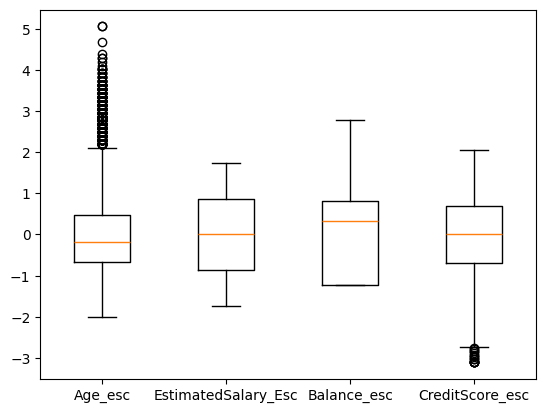

In [28]:
#graficamos para observar si alguna tiene atípicos
plt.boxplot([cmTU2['Age_esc'], cmTU2['EstimatedSalary_Esc'], cmTU2['Balance_esc'], cmTU2['CreditScore_esc']], labels= ['Age_esc', 'EstimatedSalary_Esc', 'Balance_esc', 'CreditScore_esc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3745790a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3745792290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3745792470>,
 'medians': [<matplotlib.lines.Line2D at 0x7a3745791ff0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a37457916f0>,
 'means': []}

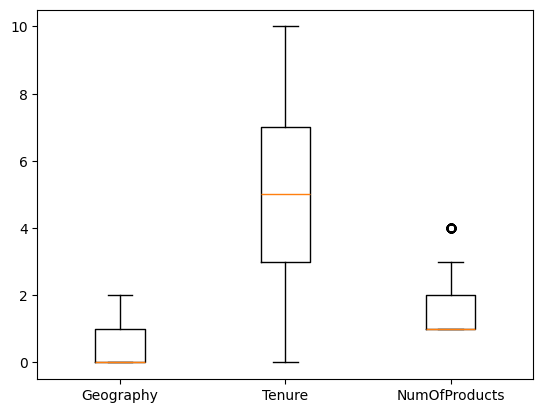

In [29]:
plt.boxplot([cmTU2['Geography'], cmTU2['Tenure'], cmTU2['NumOfProducts']], labels= ['Geography', 'Tenure', 'NumOfProducts'])

In [30]:
#necesitamos los valores correspondientes a los percentiles 25 y 75 de cada variable
p25= cmTU2['Age_esc'].describe()['25%']
p75= cmTU2['Age_esc'].describe()['75%']
IQR= p75 - p25
minbox = p25-(1.5*IQR)       #bigote inferior = Q1-1.5IQR
maxbox = p75+(1.5*IQR)       #bigote superior = Q3+1.5IQR
minbox, maxbox

(-2.3763831167397, 2.2005892369227804)

In [31]:
#esta forma no funcionó. Tengo que revisarla después
#aún así, tendría que pasarle la lista de las variables que quiero tratar

'''
for col in cmTU2.columns:
  p25= cmTU2[col].describe()['25%']
  p75= cmTU2[col].describe()['75%']
  IQR= p75 - p25
  minbox = p25-(1.5*IQR)
  maxbox = p75+(1.5*IQR)
  if cmTU2[col] < minbox:
    cmTU2[col] = minbox
  else:
    cmTU2[col]
  if cmTU2[col] > maxbox:
    cmTU2[col] = maxbox
  else:
    cmTU2[col]
'''

"\nfor col in cmTU2.columns:\n  p25= cmTU2[col].describe()['25%']\n  p75= cmTU2[col].describe()['75%']\n  IQR= p75 - p25\n  minbox = p25-(1.5*IQR)\n  maxbox = p75+(1.5*IQR)\n  if cmTU2[col] < minbox:\n    cmTU2[col] = minbox\n  else:\n    cmTU2[col]\n  if cmTU2[col] > maxbox:\n    cmTU2[col] = maxbox\n  else:\n    cmTU2[col]\n"

In [32]:
var_out = ['Age_esc', 'CreditScore_esc', 'NumOfProducts']
for col in var_out:
  p25= cmTU2[col].describe()['25%']
  p75= cmTU2[col].describe()['75%']
  IQR= p75 - p25
  minbox = p25-(1.5*IQR)
  maxbox = p75+(1.5*IQR)
  cmTU2[col] = cmTU2[col].apply(lambda x: minbox if x<minbox else x)
  cmTU2[col] = cmTU2[col].apply(lambda x: maxbox if x>maxbox else x)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a37420231c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3742022c80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3742023460>,
 'medians': [<matplotlib.lines.Line2D at 0x7a3742022740>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a37420204f0>,
 'means': []}

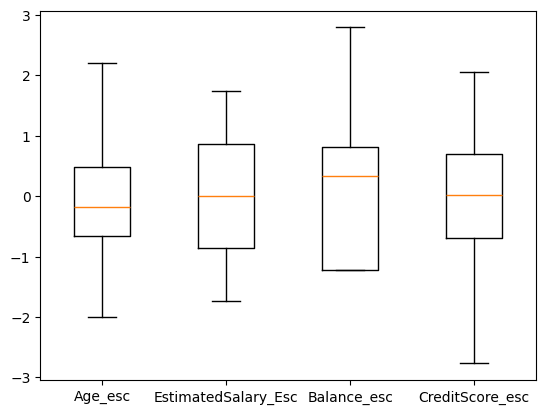

In [33]:
plt.boxplot([cmTU2['Age_esc'], cmTU2['EstimatedSalary_Esc'], cmTU2['Balance_esc'], cmTU2['CreditScore_esc']], labels= ['Age_esc', 'EstimatedSalary_Esc', 'Balance_esc', 'CreditScore_esc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3744968a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7a37449684c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3744968cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7a3744969cf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7a3744969a50>,
 'means': []}

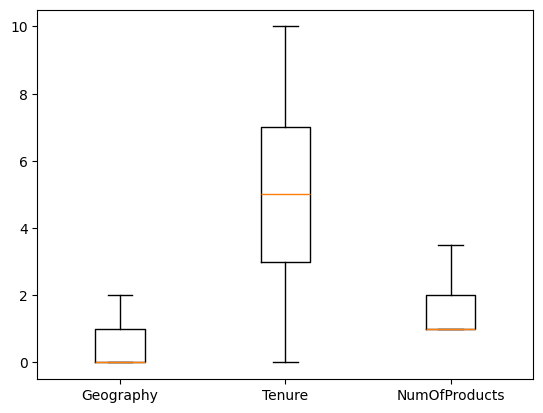

In [34]:
plt.boxplot([cmTU2['Geography'], cmTU2['Tenure'], cmTU2['NumOfProducts']], labels= ['Geography', 'Tenure', 'NumOfProducts'])

In [35]:
cmTU2.head()

,CustomerId,Geography,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Gender,Exited,Age_esc,EstimatedSalary_Esc,Balance_esc,CreditScore_esc
0,15634602,0,2,1.0,1,1,0,1,0.293517,0.021886,-1.225848,-0.326221
1,15647311,2,1,1.0,0,1,0,0,0.198164,0.216534,0.117350,-0.440036
2,15619304,0,8,3.0,1,0,0,1,0.293517,0.240687,1.333053,-1.536794
3,15701354,0,1,2.0,0,0,0,0,0.007457,-0.108918,-1.225848,0.501521
4,15737888,2,2,1.0,1,1,0,0,0.388871,-0.365276,0.785728,2.063884


In [36]:
#preparamos X y Y para el entrenamiento de los modelos
'''
Se tenían elegidas las variables para el entrenamiento:
var_predict = list(set(cm.columns)-{'RowNumber', 'Surname'} - {target, id})

Con la normalización y el tratamiento de outliers, habrá que declarar una nueva variable var_predict
'''
var_predict = list(set(cmTU2.columns)-{target, id})
var_predict

['Geography',
 'Age_esc',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'CreditScore_esc',
 'Balance_esc',
 'Gender',
 'EstimatedSalary_Esc']

In [37]:
#se guardan las var_predict como X
#se guarda la variable objetivo "Exited" como y
X = cmTU2[var_predict]
y = cmTU2[target]

In [38]:
#separación de los datos: train y test
#se deja un 70% de los datos para el entrenamiento y un 30% para la prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 123)

##Entrenamiento

###Regresión Logística

In [39]:
#otra opción, antes de comenzar el entrenamiento, puso ser convertir a variables dummy los campos 'Gender' y 'Geography'

from sklearn.linear_model import LogisticRegression   #importación
reg = LogisticRegression()                            #creación del objeto
reg.fit(X_train, y_train)                             #entreamiento con la partición de datos que se realizó antes

LogisticRegression()

In [40]:
reg.intercept_

array([-0.73838428])

In [41]:
reg.coef_

array([[ 0.08513269,  0.89266475, -0.0122014 , -0.06427533,  0.01472317,
        -1.01949915, -0.08557389,  0.31720297, -0.5102989 ,  0.02671902]])

In [42]:
reg.feature_names_in_

array(['Geography', 'Age_esc', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'CreditScore_esc', 'Balance_esc', 'Gender',
       'EstimatedSalary_Esc'], dtype=object)

In [43]:
# ln(p/(1-p)) = -0.73897543 + (-0.06403614*NumOfProducts) + (-0.51055482*Gender) + ... (-0.08485123*CreditScore_esc) = z --->
#p = 1/(1+exp(-z))
p_pred = reg.predict_proba(X_test)        #obtiene probabilidad predicha
p_pred                                    #target: [probabilidad de que sea 0, probabilidad de que sea 1] (por registro)

array([[0.93663149, 0.06336851],
       [0.95145151, 0.04854849],
       [0.96662409, 0.03337591],
       ...,
       [0.89097878, 0.10902122],
       [0.87212288, 0.12787712],
       [0.95432217, 0.04567783]])

In [44]:
p_pred[:, 1]    #probabilidad predicha de fuga (1)

array([0.06336851, 0.04854849, 0.03337591, ..., 0.10902122, 0.12787712,
       0.04567783])

In [45]:
#clasificación predicha se corresponde con la probabilidad predicha anteriormente
y_pred = reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)     #el éxito del modelo

0.819

###Árbol de Decisión

In [47]:
from sklearn.tree import DecisionTreeClassifier   #importación
dtc = DecisionTreeClassifier()                    #creación del objeto
dtc.fit(X_train, y_train)                         #entreamiento con la partición de datos que se realizó antes

DecisionTreeClassifier()

In [48]:
dtc.feature_importances_, dtc.feature_names_in_

(array([0.03326491, 0.21871386, 0.08311263, 0.10961351, 0.01701239,
        0.06301762, 0.13618464, 0.15840926, 0.02364026, 0.15703093]),
 array(['Geography', 'Age_esc', 'Tenure', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'CreditScore_esc', 'Balance_esc', 'Gender',
        'EstimatedSalary_Esc'], dtype=object))

<BarContainer object of 10 artists>

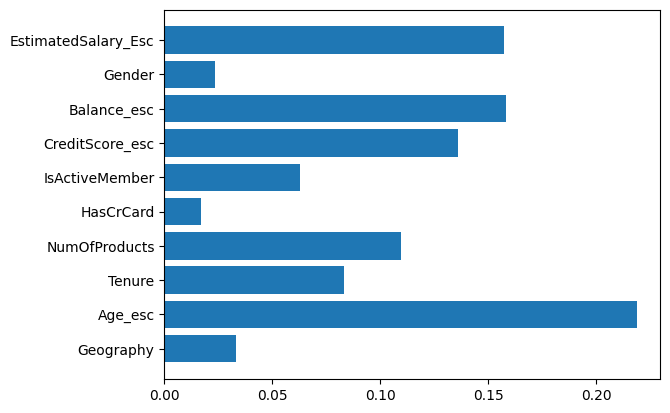

In [49]:
plt.barh(dtc.feature_names_in_, dtc.feature_importances_)   #graficamos el 'peso' que tienen las variables y vemos que hay unas que casi no influyen, como: 'HasCrCard' y 'Gender'

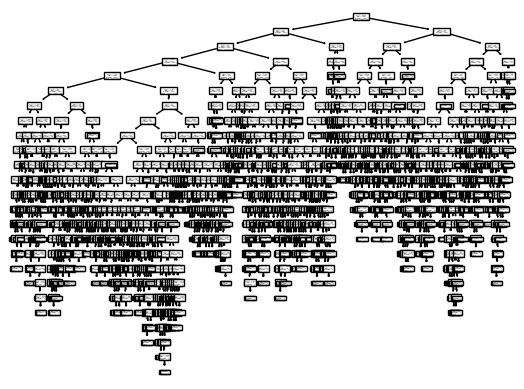

In [50]:
#no tiene sentido visualizar árboles tan grandes

from sklearn.tree import plot_tree
plot_tree(dtc)
plt.show()

In [51]:
#para poder visualizar bien el árbol completo
'''
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file= "dtc.dot")

import graphviz
with open('dtc.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)
'''

'\nfrom sklearn.tree import export_graphviz\nexport_graphviz(dtc, out_file= "dtc.dot")\n\nimport graphviz\nwith open(\'dtc.dot\') as f:\n  dot_graph = f.read()\ngraphviz.Source(dot_graph)\n'

In [52]:
#validando
y_pred = dtc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7906666666666666

In [53]:
#optimizando los hiperparámetros
dtc = DecisionTreeClassifier(max_depth = 10)
dtc.fit(X_train, y_train)

#validamos de nuevo
y_pred = dtc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)      #mejoró un poco

0.843

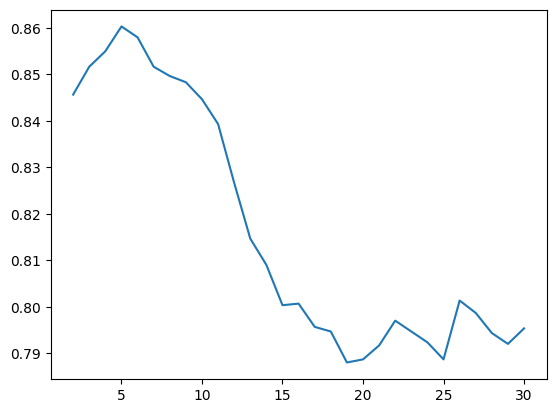

In [54]:
#conociendo el valor óptimo del hiperparámetro 'max_depth'
lista_max_d = list(range(2, 31))        #de 2 a 30 niveles de árbol (número arbitrario)

lista_scores = []
for i in lista_max_d:
  dtc = DecisionTreeClassifier(max_depth = i)      #entrenar el modelo para cada valor de 'max_depth', de 2 a 30
  dtc.fit(X_train, y_train)
  y_pred = dtc.predict(X_test)
  lista_scores.append(metrics.accuracy_score(y_test, y_pred))   #se va guardando el 'accuracy_score' por cada número de 'max_depth'

plt.plot(lista_max_d, lista_scores)

In [55]:
#aparentemente, el valor óptimo es '5'
lista_scores.index(max(lista_scores))     #con este código se conoce el index del nivel con máximo escore 0-->2, 1-->3, 2-->4, 3-->5

3

In [56]:
print(f'el máximo score se alcanza con {lista_max_d[3]} niveles, con un éxito de {max(lista_scores):.4f}')

el máximo score se alcanza con 5 niveles, con un éxito de 0.8603


In [57]:
#se entrena el modelo con el valor óptimo de max_depth = 5
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8606666666666667

<BarContainer object of 10 artists>

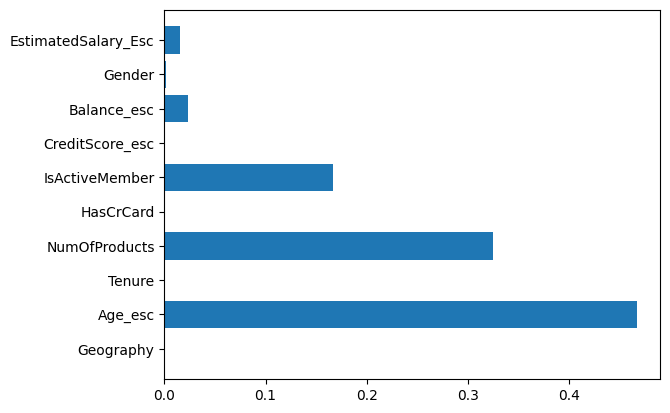

In [58]:
#revisamos la importancia que tienen ahora las variables
plt.barh(dtc.feature_names_in_, dtc.feature_importances_)
#tenemos más certeza de variables que no aportan. Se podrían eliminar

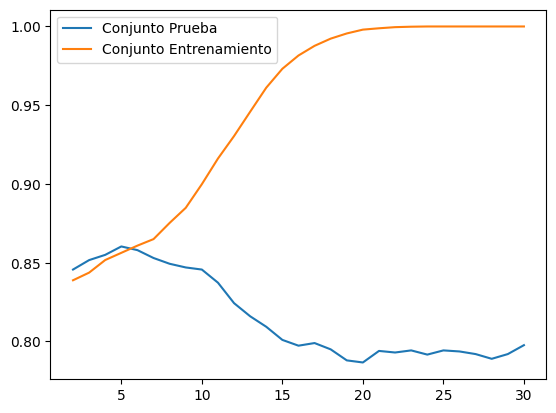

In [59]:
#mismo código anterior
lista_max_d = list(range(2, 31))        #de 2 a 30 niveles de árbol

lista_scores = []
lista_scores_train = []     #nueva lista para el conjunto de entrenamiento
for i in lista_max_d:
  dtc = DecisionTreeClassifier(max_depth = i)      #entrenar el modelo para cada valor de 'max_depth', de 2 a 30
  dtc.fit(X_train, y_train)
  y_pred = dtc.predict(X_test)
  lista_scores.append(metrics.accuracy_score(y_test, y_pred))   #se va guardando el 'accuracy_score' por cada número de 'max_depth'

  #predecir las 'y' de entrenamiento para saber si el modelo está sobreentrenado
  y_pred_train = dtc.predict(X_train)
  lista_scores_train.append(metrics.accuracy_score(y_train, y_pred_train))

plt.plot(lista_max_d, lista_scores)
plt.plot(lista_max_d, lista_scores_train)     #aquí observamos que el éxito tiende a 1, mientras más niveles tiene el árbol. Significa que más niveles sobreentrenan el modelo.
                                              #con cierto número de niveles, se especializa tanto el modelo, que no puede predecir bien nuevos datos, por eso el score baja

plt.legend(labels= ['Conjunto Prueba', 'Conjunto Entrenamiento'])

In [60]:
#modelo final
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8603333333333333

###Random Forest

In [61]:
#se corre un modelo sin modificar ningún hiperparámetro
from sklearn.ensemble import RandomForestClassifier   #importación
rfc = RandomForestClassifier()                        #creación del objeto
rfc.fit(X_train, y_train)                             #entrenamiento
y_pred = rfc.predict(X_test)                          #predicción de las 'y' de prueba
metrics.accuracy_score(y_test, y_pred)                #métrica

0.8696666666666667

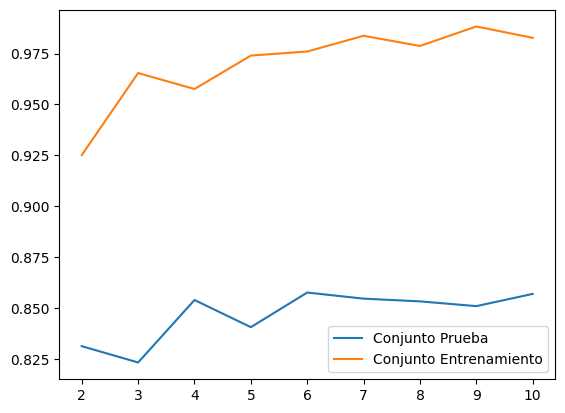

In [62]:
#mejorando el entrenamiento (n_estimators: cantidad de árboles)
lista_n_est = list(range(2, 11))        #esta lista representa el número de árboles (número arbitrario)
lista_scores = []
lista_scores_train = []
for i in lista_n_est:
  rfc = RandomForestClassifier(n_estimators= i)         #entrenar el modelo para cada valor de 'n_estimators', de 2 a 10
  rfc.fit(X_train, y_train)
  y_pred = rfc.predict(X_test)
  lista_scores.append(metrics.accuracy_score(y_test, y_pred))

  #predecir las 'y' de entrenamiento para saber si el modelo está sobreentrenado
  y_pred_train = rfc.predict(X_train)
  lista_scores_train.append(metrics.accuracy_score(y_train, y_pred_train))

plt.plot(lista_n_est, lista_scores)
plt.plot(lista_n_est, lista_scores_train)
plt.legend(labels= ['Conjunto Prueba', 'Conjunto Entrenamiento'])

In [63]:
#modelo óptimo (6 árboles)
rfc = RandomForestClassifier(n_estimators= 6)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8506666666666667

###Suport Vector Machine

In [64]:
from sklearn.svm import SVC             #importación
svc = SVC()                             #creación del objeto
svc.fit(X_train, y_train)               #entrenamiento
y_pred = svc.predict(X_test)            #predicción de conjunto de prueba
metrics.accuracy_score(y_test, y_pred)  #métrica

0.817

In [65]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

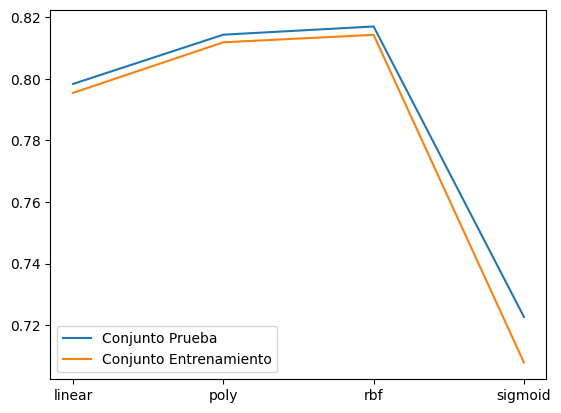

In [66]:
#mejorando el entrenamiento (hiperparámetro 'kernel')
list_kernel = ['linear', 'poly', 'rbf', 'sigmoid']   #el valor 'precomputed' debe ser una matriz cuadrada. Debido a eso, no se utiliza para este entrenamiento
lista_scores = []
lista_scores_train = []
for i in list_kernel:
  svc = SVC(kernel = i)
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  lista_scores.append(metrics.accuracy_score(y_test, y_pred))

  y_pred_train = svc.predict(X_train)
  lista_scores_train.append(metrics.accuracy_score(y_train, y_pred_train))

plt.plot(list_kernel, lista_scores)
plt.plot(list_kernel, lista_scores_train)
plt.legend(labels= ['Conjunto Prueba', 'Conjunto Entrenamiento'])

In [67]:
#mejor modelo
svc = SVC(kernel = 'rbf')     #el hiperparámetro 'kernel' tiene por defecto el valor 'rbf'
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.817